# Module 3 - Statistical Hypothesis testing


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## The z-test

The $z$-test is used to confirm or refute an assumption about the (unknown) *population mean*, based on a sufficiently large sample.

### De right-tailed $z$-test

It is generally assumed that each day, superheroes save on average $\mu = 3.3$ people. Researchers want to check this assumption and conduct a sample of 30 superheroes. In this sample, the mean is $\overline{x} = 3,483$. So we can surmise that superheroes perform *more* rescues on average. 

The standard deviation in the population is assumed to be known and is $\sigma = 0.55$.

The testing procedure then runs as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

In [2]:
# Properties of the sample:
n = 30      # sample size
sm = 3.483  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 3.483$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.


In [3]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.03420
p < a: reject H0


An alternative method is to determine the critical region, i.e. the set of all values for the sample mean where $H_0$ may be rejected. The boundary of that area is called the critical value $g$. To the left of it you can't reject $H_0$ (acceptance region), to the right you can (critical region). The area of the acceptance region is $1 - \alpha$, the area of the critical region is $\alpha$.

In [4]:
# Critical value according to the formula in the lecture slides
#g = m0 + stats.norm.isf(a) * s / np.sqrt(n)         
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(a, loc=m0, scale=s / np.sqrt(n)) #
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 3.465
sample mean = 3.483 > g = 3.465: reject H0


A plot of this case:

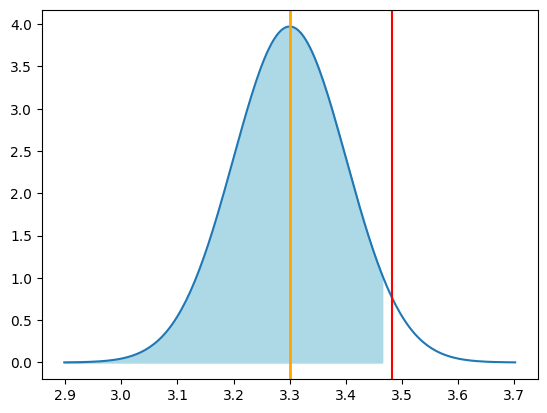

In [5]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')

### The left-tailed $z$-test

Let's assume that the result of the sample was $\overline{x} = 3.117$. In that case, we have reasons to assume that the population mean is *lower* than 3.3. We can verify this with a left-tailed $z$ test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu < 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

In [6]:
# Properties of the sample:
n = 30      # sample size
sm = 3.117  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Calculate the test statistic: $\overline{x} = 3.117$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [7]:
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n)) # Let op! cdf() ipv sf()!
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

p-waarde: 0.03420
p < a, dus H0 verwerpen


In this case, the critical value $g$ is left of the mean. On the right of $g$, you may not reject $H_0$ (acceptance region), on the left, you can (critical region).

In [9]:
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-a, loc=m0, scale=(s / np.sqrt(n)))
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 3.135
sample mean = 3.117 < g = 3.135: reject H0


We can conclude that if we assume that $H_0$ is true, the probability to draw a sample from this population with this particular value for $\overline{x}$ is very small indeed. With the chosen significance level, we can reject the null hypothesis.

The plot of this case:

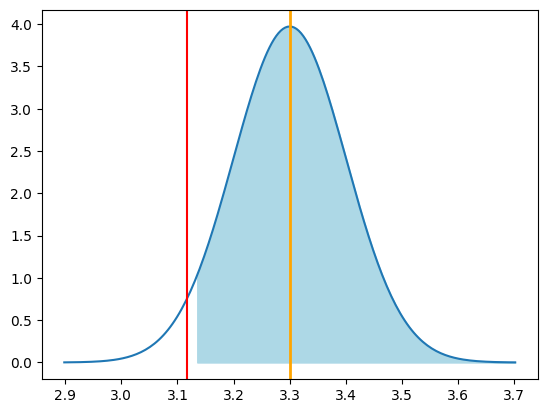

In [10]:
# Gauss-curve:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue')

### The two-tailed $z$-test

When we don't want to test whether the population mean is either greater or lower than a hypothetical value, but only want to know if the sample mean is "close enough", we can use a two-tailed $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu \ne 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$


In [ ]:
# Properties of the sample:
n = 30      # sample size
sm = 3.483  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Determine the test statistic $\overline{x} = 3.483$

**Step 4.** Calculate the $p$-value and reject $H_0$ if $p < \alpha/2$ (why do we divide by 2?).

In [ ]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < a/2):
    print("p < a/2, dus H0 verwerpen")
else:
    print("p > a/2, dus H0 niet verwerpen")

In this case, we have two critical values: $g_1$ on the left of the mean and $g_2$ on the right. The acceptance region still has area $1-\alpha$ and the critical region has area $\alpha$.

In [ ]:
g1 = m0 - stats.norm.isf(a/2) * s / np.sqrt(n)
g2 = m0 + stats.norm.isf(a/2) * s / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < sm and sm < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % sm)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % sm)

A plot of this case:

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=m0, scale=s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=m0, scale=s/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue')

So if we do not make a priori statement whether the actual population mean is either smaller or larger, then the obtained sample mean turns out to be sufficiently probable. We cannot rule out a random sampling error. Or, in other words, we *cannot* reject the null hypothesis here.

### Right-tailed $t$-test

Suppose that the superhero researchers were unable to take a sufficiently large sample due to time constraints and only made $n = 20$ observations, with the same sample mean $\overline{x} = 3,483$. The standard deviation in this sample turned out to be $s = 0.55$.

In these circumstances, with the same significance level $\alpha = 0.05$, can we sustain the conclusion that superheroes save *more* than 3.3 people every day?

The testing procedure then goes as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 20      # sample size
sm = 3.483  # sample mean
ss = 0.55   # sample(!) standard deviation
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Determine the test statistic $\overline{x} = 3.483$

**Step 4.** Calculate the $p$-value and reject $H_0$ if $p < \alpha$

In [ ]:
# Remark that we use the t-distribution here!
p = stats.t.sf(sm, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

To calculate the critical value, we use the `isf()` function with $n-1$ degrees of freedom.

In [ ]:
g = stats.t.isf(a, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

The plot for this case:

In [8]:
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * ss/np.sqrt(n), m0 + 4 * ss/np.sqrt(n), num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=m0, scale=ss/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')

NameError: name 'ss' is not defined

In other words, even if we get similar results in our sample, we cannot reach the same conclusion. Because our sample is too small, there is greater uncertainty as to whether the value of the sample mean is extreme enough to reject the null hypothesis.

### Use of the function `ttest_1samp()`

SciPy provides a function `ttest_1samp()` that allows you to perform a *two-tailed* t-test on a collection of observations:

In [ ]:
observations = [
  3, 2, 3, 1, 10, 4, 2, 7, 3, 0,
  3, 1, 2, 3,  4, 0, 3, 8, 3, 7]
a = 0.05
m0 = 3.3

t_stat, p_val = stats.ttest_1samp(observations, m0)
print("Sample mean        : %.3f" % np.mean(observations))
print("t-score            : %.3f" % t_stat)
print("p-value (2-tailed) : %.5f" % p_val)
print("p-value (1-tailed) : %.5f" % (p_val/2))

If you wanted to perform a one-tailed test, you can derive the correct conclusion from the results of the function. The $t$-score will be negative if the sample mean is to the left of `m0`. In that case, you would perform a left-tailed test. In a one-tailed test we divide the result for $p$ by 2 and then compare with $\alpha$. The decision then becomes:

- For a right-tailed test: if $p/2 < \alpha$ and $t > 0$ we can reject the null hypothesis
- For a left-tailed test: if $p/2 < \alpha$ and $t < 0$ we can reject the null hypothesis

The conclusion here is that the sample mean of 3.45 is not a sufficient reason to reject the null hypothesis because $p \approx 0.401$ is greater than the significance level $\alpha = 0.05$.